In [1]:
import sys,os,os.path

# tell python to look for the path to analyse
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
from os import walk
from os.path import exists
from os import mkdir
from scipy import stats
import h5py
import pandas as pd
import tables as tb
from tqdm import tqdm

from core import processing as proc
from core import plotting as pl
from core import misc as misc

In [2]:
# set yout full path
storage = "/home/e78368jw/Documents/TPB_Project/Wavedump_Wrapper_TPB/storage/"
RUN_NO = "RUN000063"
PATH = storage + "John/testing/" + RUN_NO + "/PMT/Nominal/"
event_name = "wave_6.h5"
output_dir = storage + "John/testing/RUN000063/PMT/"


In [3]:
f = h5py.File(PATH + event_name)
# keys of the file
print(list(f.keys()))
# shape
print(f['pmtrw'])
# event
print(f['pmtrw'][0])


['ADC', 'pmtrw']
<HDF5 dataset "pmtrw": shape (345774, 150), type "<u2">
[8196 8192 8198 8195 8191 8194 8194 8194 8194 8189 8190 8192 8195 8194
 8196 8194 8190 8194 8192 8195 8190 8199 8190 8192 8192 8194 8191 8194
 8193 8196 8195 8196 8191 8191 8198 8196 8201 8192 8193 8193 8192 8190
 8195 8197 8193 8197 8192 8197 8196 8191 8193 8195 8188 8193 8193 8192
 8195 8194 8190 8198 8192 8191 8194 8188 8196 8194 8190 8195 8196 8196
 8199 8194 8190 8191 8197 8190 8198 8193 8195 8189 8201 8195 8187 8201
 8195 8189 8191 8205 8195 8194 8190 8197 8193 8195 8189 8186 8200 8196
 8191 8189 8201 8189 8193 8195 8194 8196 8188 8201 8190 8196 8194 8193
 8194 8193 8195 8194 8196 8191 8197 8189 8196 8193 8193 8194 8192 8194
 8189 8195 8193 8195 8190 8197 8191 8193 8195 8196 8195 8193 8197 8193
 8202 8193 8195 8189 8203 8197 8190 8198 8192 8195]


### Visualise events

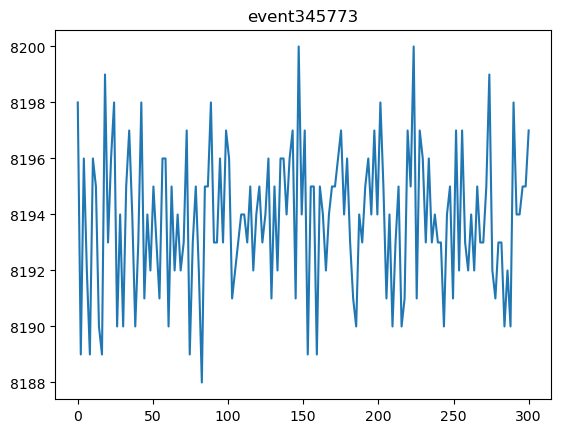

In [11]:
# visualise events
q = 345773
length = len(f['pmtrw'][q])

time = np.linspace(0,length*2, num = length)
plt.plot(time, f['pmtrw'][q])
plt.title('event' + str(q))
plt.show()

### Calculate the ADC values for charged histogram

In [4]:
ADC_list = []
print("Cooking data...")
# collect ADC values over all array positions
for i in tqdm(range(len(f['pmtrw']))):
    # collect event
    a = f['pmtrw'][i]

    # flip to positive
    a = -a
    b = proc.subtract_baseline(a, type = 'median')
    c = proc.integrate_range(b, window = 10, debug=False)

    ADC_list += (c),
    

Cooking data...


100%|██████████| 345774/345774 [00:29<00:00, 11683.40it/s]


Displaying ADC data...
Min: -51.0      Max: 821.0


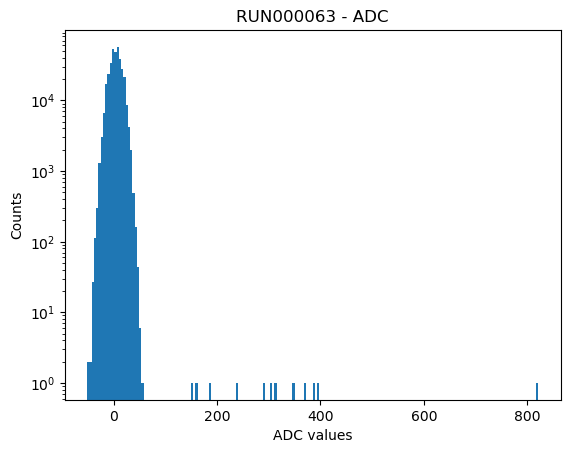

In [5]:
print("Displaying ADC data...")
print("Min: {}      Max: {}".format(min(ADC_list), max(ADC_list)))
plt.hist(ADC_list, bins = 200)
plt.yscale('log')
plt.title(RUN_NO + " - ADC")
plt.xlabel('ADC values')
plt.ylabel('Counts')
plt.show()

In [27]:
print(ADC_list)

[8.0, 4.0, 5.0, -5.0, 19.0, 11.0, -8.0, -9.0, 9.0, -7.0, -6.0, -16.0, 12.0, 7.0, 10.0, 1.0, 2.0, -4.0, -5.0, 7.0, 8.0, 14.0, 5.0, 14.0, -9.0, -11.0, 19.0, 22.0, 6.0, 1.0, 7.0, -6.0, -3.0, -2.0, -7.0, -10.0, 0.0, 1.0, 0.0, -8.0, 3.0, 8.0, -12.0, -21.0, 1.0, 8.0, -30.0, 9.0, 13.0, 3.0, 3.0, -4.0, 6.0, -6.0, 2.0, 12.0, 3.0, -4.0, -7.0, -12.0, -3.0, 7.0, -16.0, 7.0, 2.0, -7.0, 17.0, -14.0, -1.0, 13.0, -4.0, 7.0, -4.0, -10.0, 21.0, 5.0, 10.0, 13.0, 10.0, 20.0, -8.0, -7.0, -6.0, 4.0, 13.0, -10.0, -3.0, 5.0, 21.0, 22.0, 15.0, 4.0, -3.0, 4.0, 0.0, 2.0, 7.0, 14.0, -17.0, 6.0, -3.0, 8.0, 9.0, 25.0, 21.0, -24.0, 8.0, 15.0, 12.0, -4.0, 18.0, 14.0, 12.0, 18.0, -2.0, -9.0, -18.0, 13.0, 11.0, 6.0, -13.0, -3.0, 3.0, -1.0, -1.0, 0.0, 9.0, -12.0, 1.0, -2.0, 13.0, 11.0, 14.0, -8.0, 4.0, -9.0, 31.0, -9.0, 5.0, 1.0, -1.0, -1.0, 3.0, -4.0, 0.0, 24.0, -5.0, 10.0, 3.0, -9.0, -7.0, -9.0, -16.0, 1.0, 5.0, 17.0, 0.0, -19.0, 2.0, 10.0, 6.0, 22.0, -3.0, -9.0, 0.0, 3.0, 10.0, -17.0, 1.0, -12.0, 11.0, 11.0, 10.0, 10